In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [139]:
# Load the dataset
df = pd.read_csv('dataset/nhanes_age_prediction.csv')

In [140]:
# Print the shape of the dataset
df.shape

(2278, 10)

In [141]:
# Display the first few rows of the dataset
print(df.head())

      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


In [142]:
# Display the summary statistics of the dataset
print(df.describe())

               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXBMI  \
count   2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean   78691.853819    41.795874     1.511414     1.822651    27.955180   
std     2921.365151    20.156111     0.499979     0.398918     7.248962   
min    73564.000000    12.000000     1.000000     1.000000    14.500000   
25%    76171.750000    24.000000     1.000000     2.000000    22.800000   
50%    78749.000000    41.000000     2.000000     2.000000    26.800000   
75%    81213.500000    58.000000     2.000000     2.000000    31.200000   
max    83727.000000    80.000000     2.000000     7.000000    70.100000   

            LBXGLU       DIQ010       LBXGLT        LBXIN  
count  2278.000000  2278.000000  2278.000000  2278.000000  
mean     99.553117     2.016242   114.978929    11.834794  
std      17.889834     0.185556    47.061239     9.718812  
min      63.000000     1.000000    40.000000     0.140000  
25%      91.000000     2

In [143]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None


In [144]:
# Check for missing values
print(df.isnull().sum())

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


In [145]:
if (df.duplicated().values.any() == True):
  ndup = df[df.duplicated()].shape[0]
  print(f"This dataset has {ndup} duplicated rows")
  data = df.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset.")

else:
  print("This dataset has no duplicated rows.")

This dataset has no duplicated rows.


In [146]:
# Encode the target variable
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

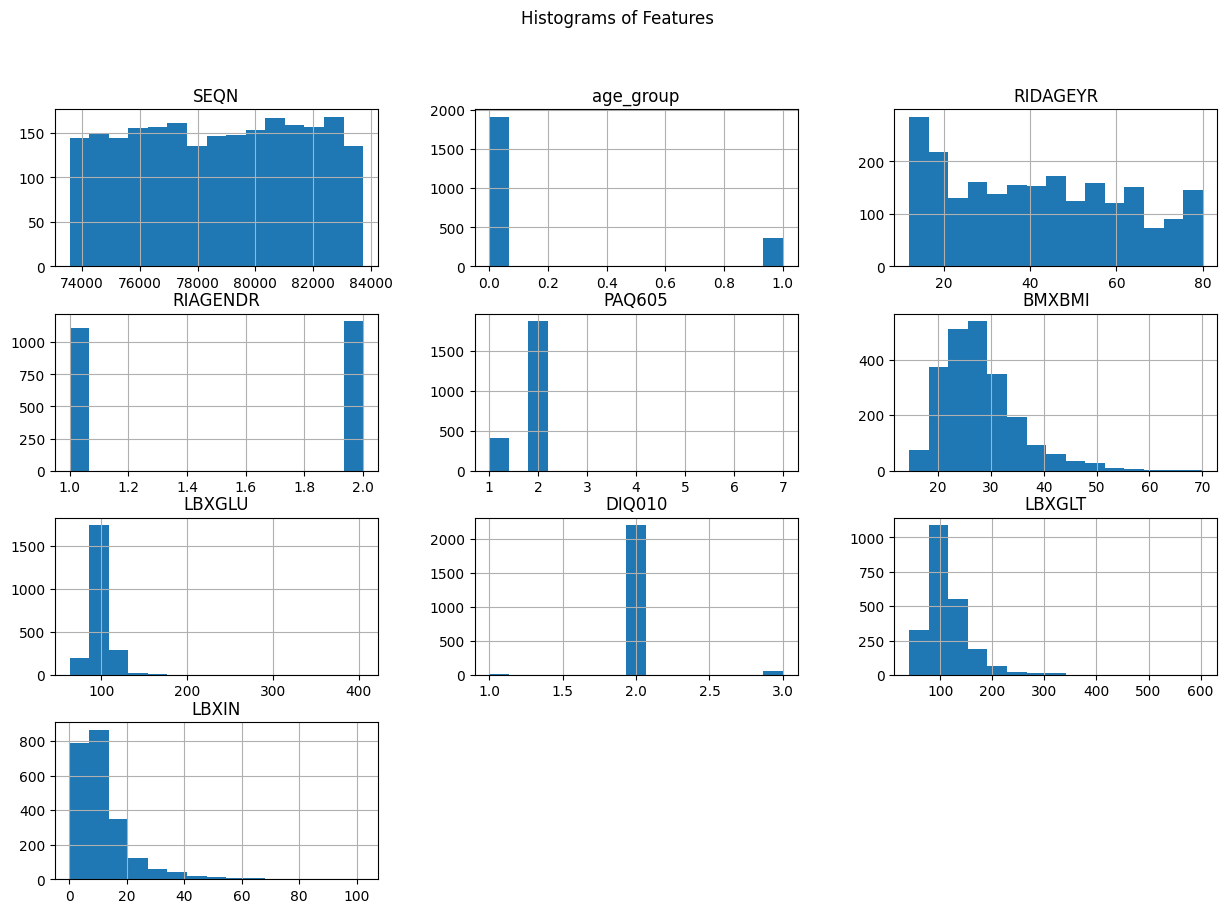

In [147]:
# Plot histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Features")
plt.show()

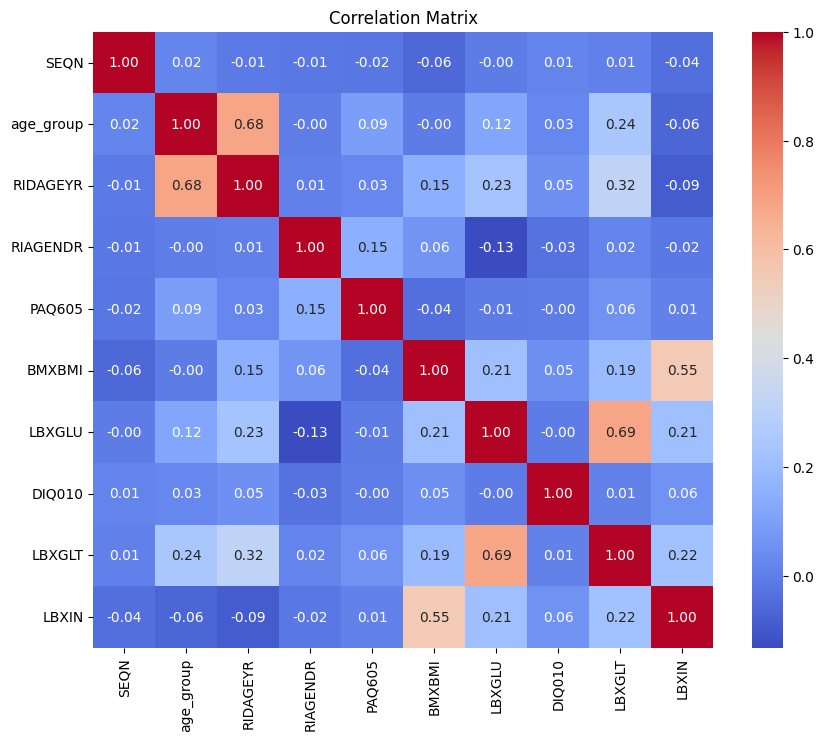

In [148]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


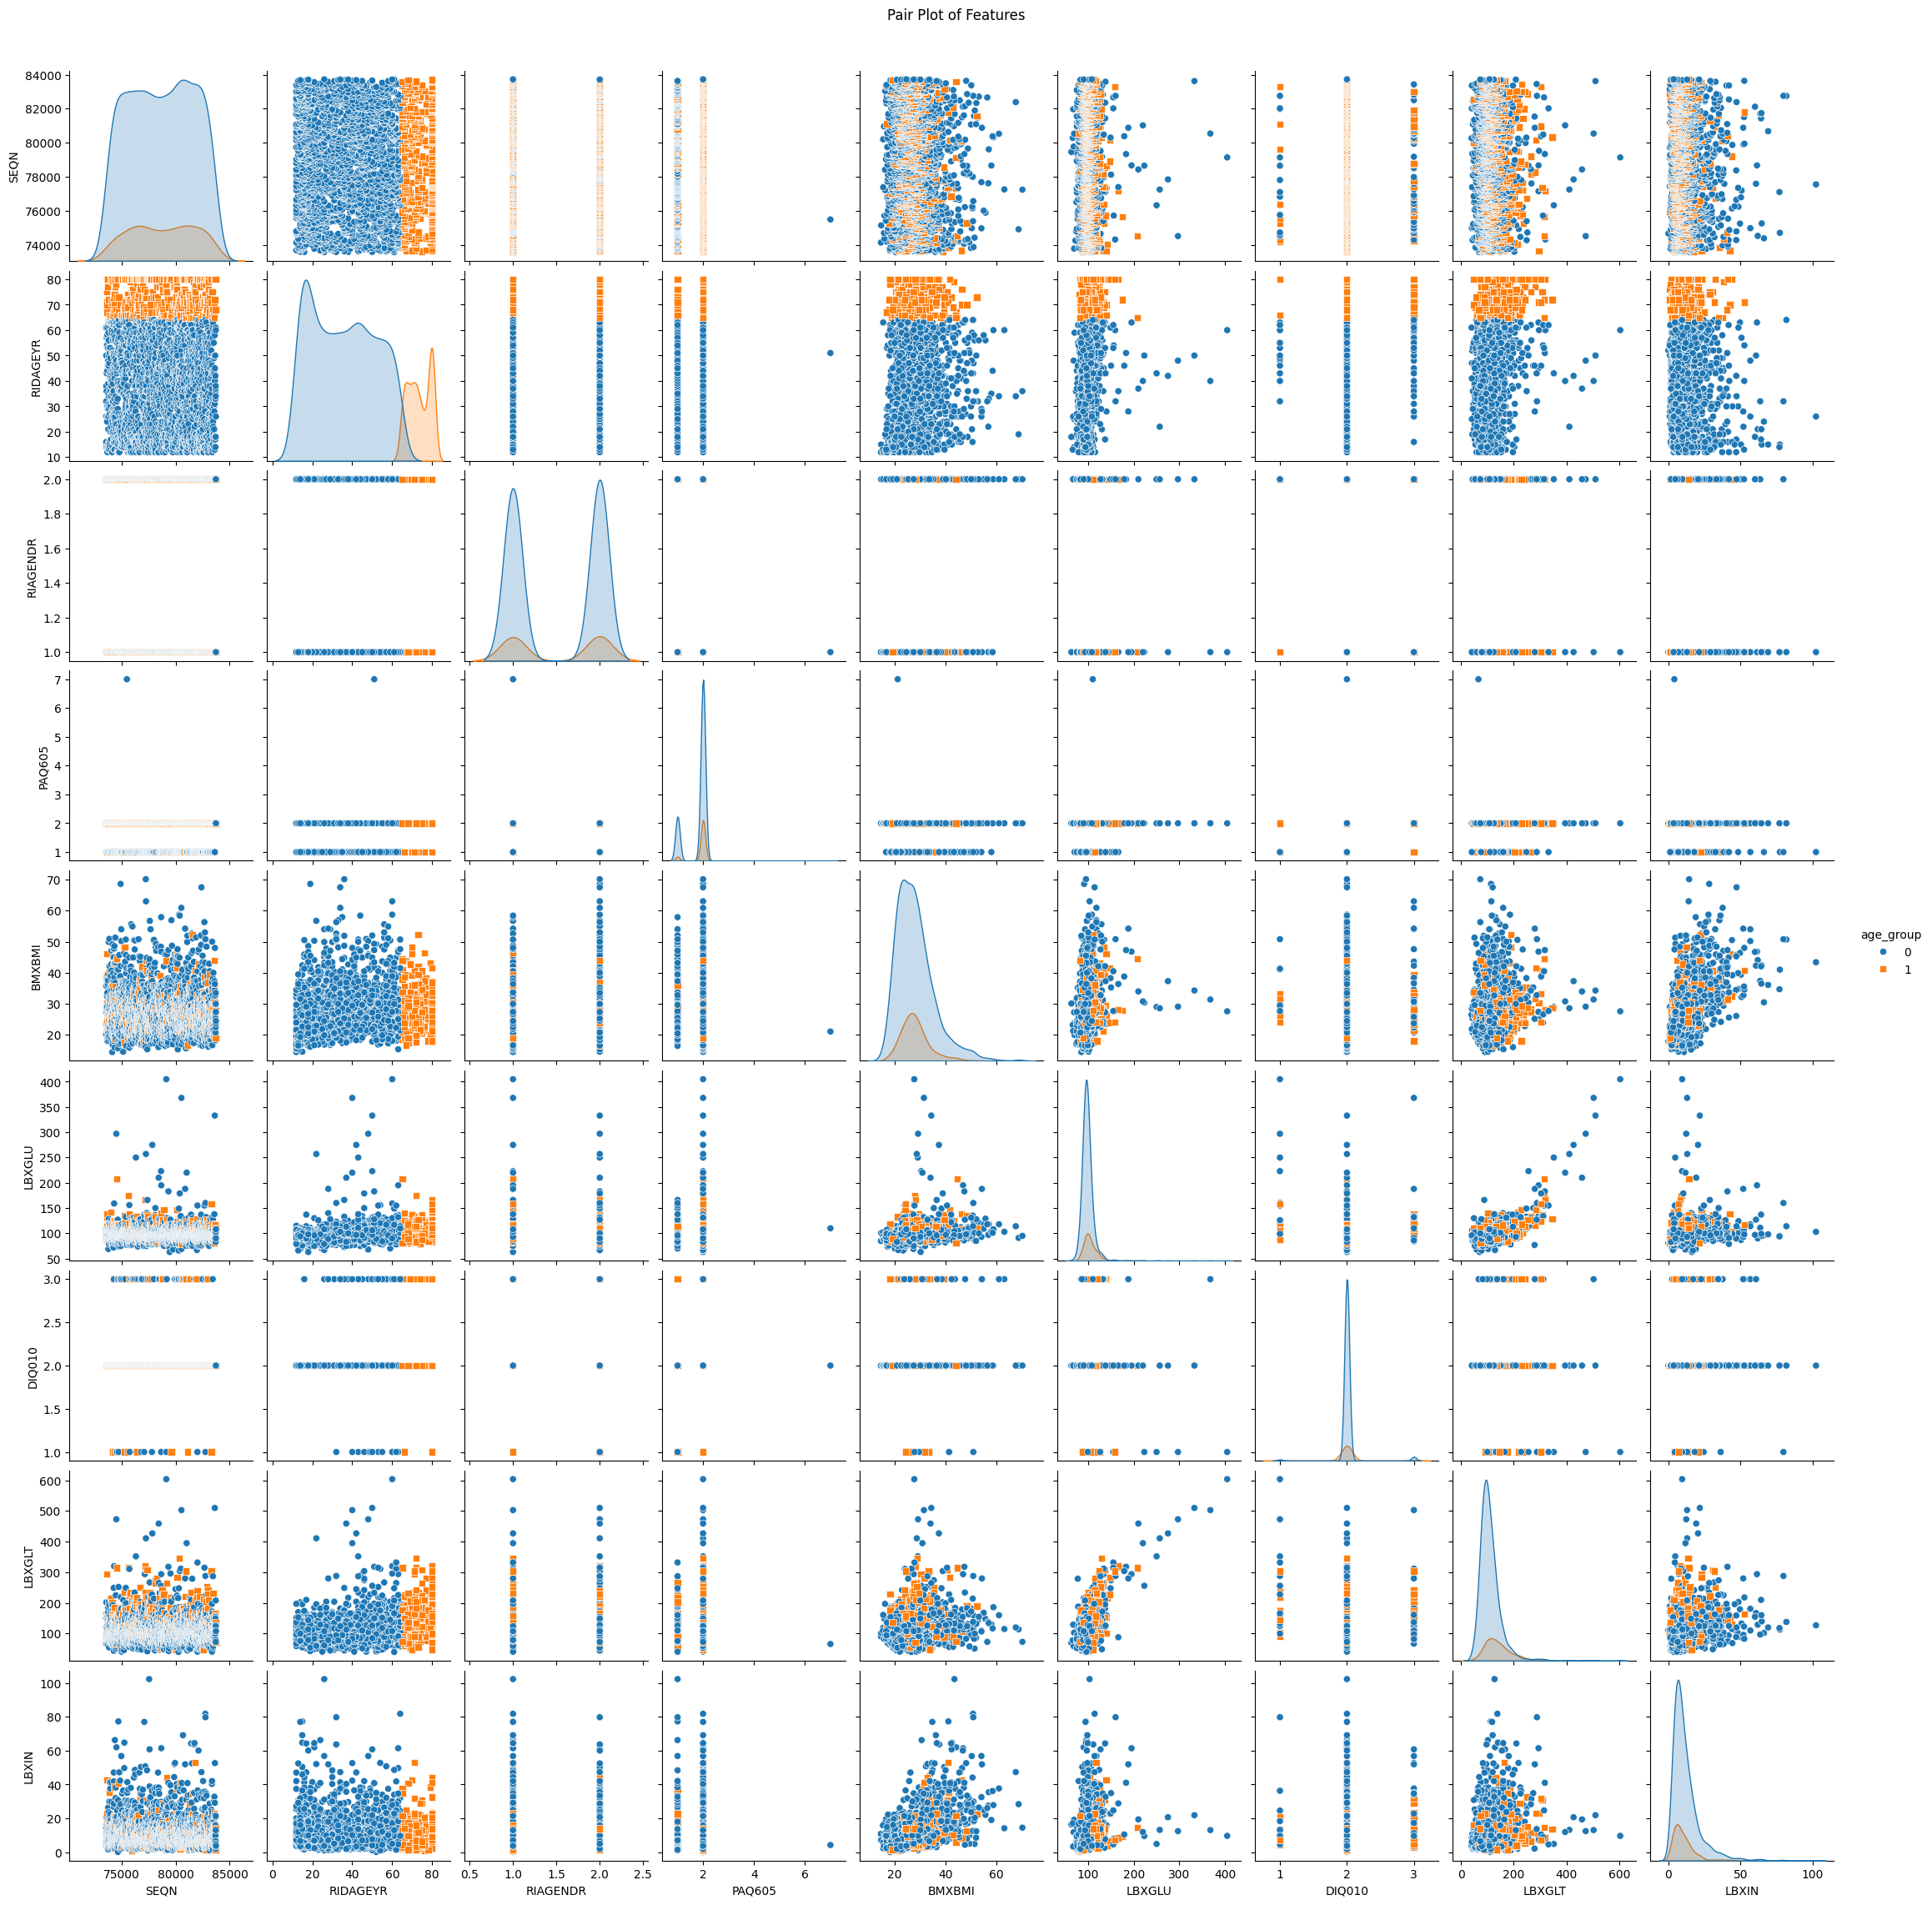

In [149]:
# Pair plot
sns.pairplot(df, hue='age_group', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

## Preparing the dataset

Prepare normal, standardized and PCA-reduced dataset for classification.

1. Normal dataset

In [150]:
# Separate input features and target variable
X = df.drop('age_group', axis=1)  # Input attributes
y = df['age_group']               # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Inspecting the shape of the dataset and printing first five values
print(f"\nNumber of samples and attributes of X: {X.shape}\n")
print(X.head())



Number of samples and attributes of X: (2278, 9)

      SEQN  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0  73564.0      61.0       2.0     2.0    35.7   110.0     2.0   150.0  14.91
1  73568.0      26.0       2.0     2.0    20.3    89.0     2.0    80.0   3.85
2  73576.0      16.0       1.0     2.0    23.2    89.0     2.0    68.0   6.14
3  73577.0      32.0       1.0     2.0    28.9   104.0     2.0    84.0  16.15
4  73580.0      38.0       2.0     1.0    35.9   103.0     2.0    81.0  10.92


2. Standardized Dataset

Standardizing the data subtracts the mean and scales the values to unit standard deviation. It is applied to the input data to bring values to a standard range.

In [151]:
# Using the StandardScaler class to transform the regular data to Standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

# Using train_test_split to create a new split for the Standardized input data
X_train_std, X_test_std = train_test_split(X_std, test_size=0.25, random_state=42)

# Inspecting the shape of the dataset after Standardization and taking a peak into it
print(f"\nNumber of samples and attributes of X after standardization: {X_std.shape}\n")
X_std.head()


Number of samples and attributes of X after standardization: (2278, 9)



,0,1,2,3,4,5,6,7,8
0,-1.755679,0.952979,0.977428,0.444672,1.068639,0.584085,-0.087553,0.744323,0.316487
1,-1.754310,-0.783849,0.977428,0.444672,-1.056270,-0.590024,-0.087553,-0.743427,-0.821762
2,-1.751571,-1.280085,-1.023094,0.444672,-0.656125,-0.590024,-0.087553,-0.998470,-0.586084
3,-1.751228,-0.486107,-1.023094,0.444672,0.130367,0.248625,-0.087553,-0.658413,0.444103
4,-1.750201,-0.188365,0.977428,-2.062661,1.096235,0.192715,-0.087553,-0.722174,-0.094147


3. PCA reduced dataset

Principal Component Analysis reduces the features of the data by finding their directions of maximum variance and projecting the data along those directions, thus preserving information of the original attributes and also reducing the size of the dataset for better computations and visualisations.


PCA Features: Number of samples and attributes: (2278, 2)


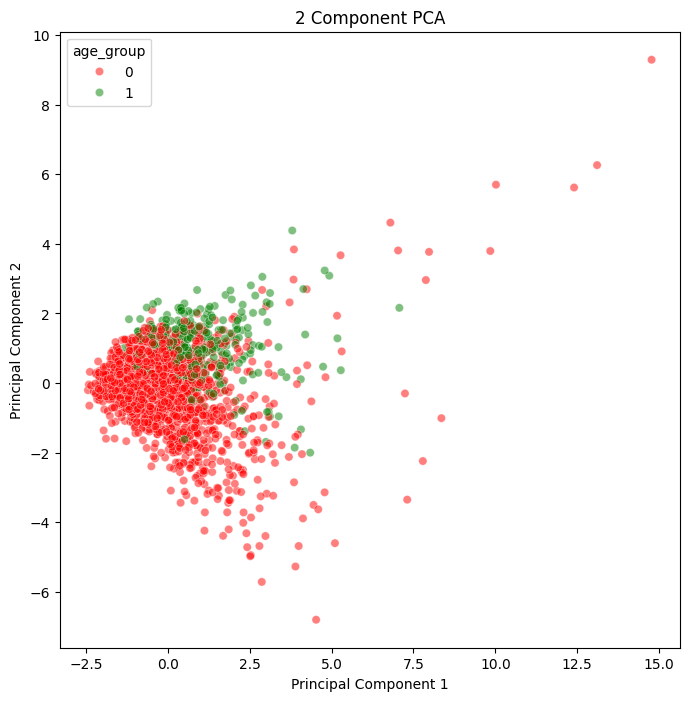

In [152]:
# Perform PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print(f'\nPCA Features: Number of samples and attributes: {X_pca.shape}')

# Using train_test_split to create a new split for the PCA reduced input data
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.25, random_state=42)

# Convert PCA result to DataFrame for visualization
pca_df = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([pca_df, df[['age_group']].reset_index(drop=True)], axis=1)

# Visualize the PCA results
plt.figure(figsize=(8,8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='age_group', data=pca_df, palette=['r', 'g'], alpha=0.5)
plt.title('2 Component PCA')
plt.show()


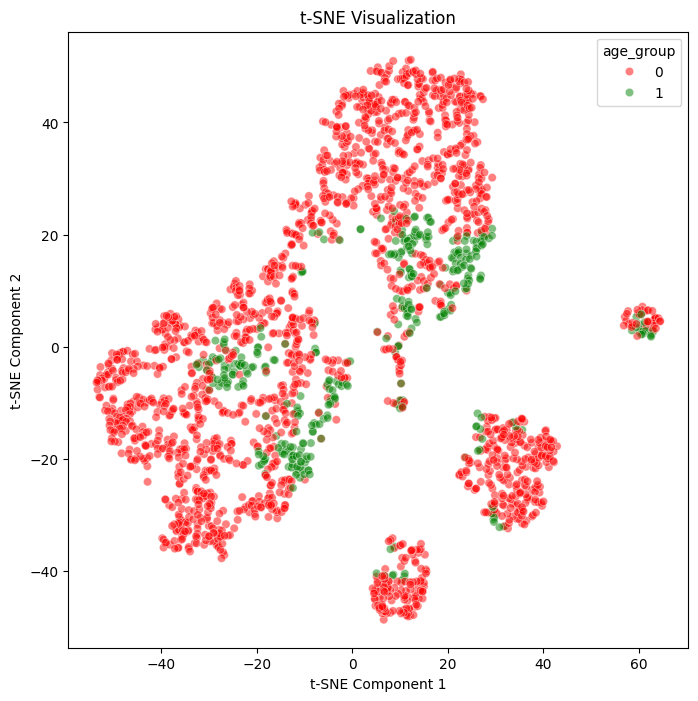

In [153]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components= 2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Convert t-SNE result to DataFrame for visualization
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df = pd.concat([tsne_df, df[['age_group']].reset_index(drop=True)], axis=1)

# Visualize the t-SNE results
plt.figure(figsize=(8, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='age_group', data=tsne_df, palette=['r', 'g'], alpha=0.5)
plt.title('t-SNE Visualization')
plt.show()


#### Logistic Regression (Baseline Model)


Logistic Regression (Baseline):
Accuracy score:  0.9771929824561404
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       475
           1       0.91      0.96      0.93        95

    accuracy                           0.98       570
   macro avg       0.95      0.97      0.96       570
weighted avg       0.98      0.98      0.98       570



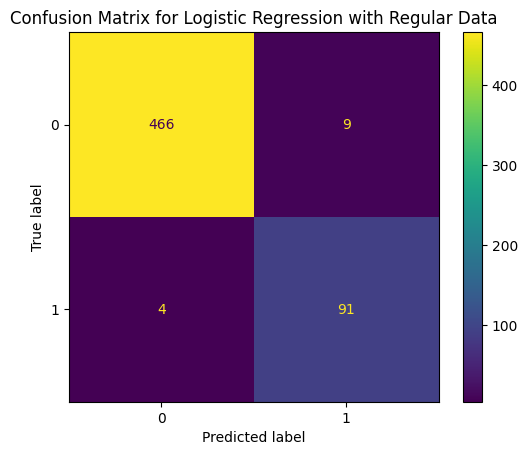

In [154]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression (Baseline):")
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

disp_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
disp_lr.plot()
plt.title("Confusion Matrix for Logistic Regression with Regular Data")
plt.show()


### Logisitc Regression (Standardized)


Logistic Regression (Standardized):
Accuracy: 0.9982456140350877
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      0.99      0.99        95

    accuracy                           1.00       570
   macro avg       1.00      0.99      1.00       570
weighted avg       1.00      1.00      1.00       570


 
 Cross Validation Score:  0.99118 +/- 0.00489


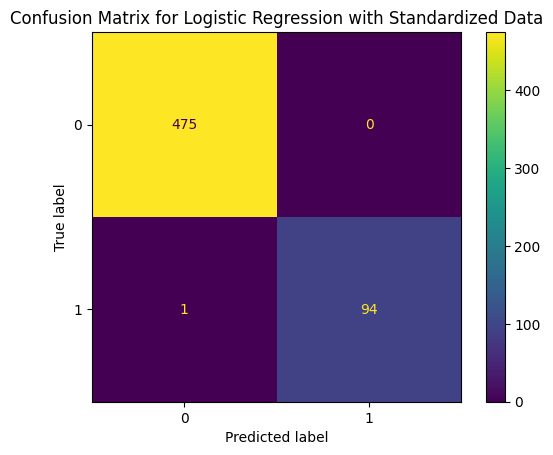

In [155]:
log_reg_std = LogisticRegression()
log_reg_std.fit(X_train_std, y_train)
y_pred_std_log = log_reg_std.predict(X_test_std)
accuracy_std_log = accuracy_score(y_test, y_pred_std_log)
report_std_log = classification_report(y_test, y_pred_std_log)
print("\nLogistic Regression (Standardized):")
print(f"Accuracy: {accuracy_std_log}")
print(f"Classification Report:\n{report_std_log}")

cv_scores_log_reg_std = cross_val_score(log_reg_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_log_reg_std = (str(cv_scores_log_reg_std.mean().round(5)) + ' +/- ' + str(cv_scores_log_reg_std.std().round(5)))
print('\n', "\n Cross Validation Score: ", cv_score_log_reg_std)

disp_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_std_log))
disp_lr.plot()
plt.title("Confusion Matrix for Logistic Regression with Standardized Data")
plt.show()

### Logistic Regression (PCA Reduced)


Logistic Regression (PCA Reduced Data):
Accuracy: 0.8614035087719298
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       475
           1       0.69      0.31      0.42        95

    accuracy                           0.86       570
   macro avg       0.78      0.64      0.67       570
weighted avg       0.84      0.86      0.84       570


 
 Cross Validation Score:  0.83847 +/- 0.01115


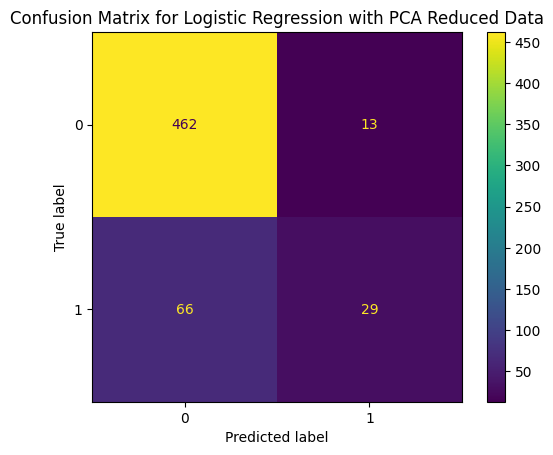

In [156]:
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)
y_pred_log_pca = log_reg_pca.predict(X_test_pca)

accuracy_log_pca = accuracy_score(y_test, y_pred_log_pca)
report_log_pca = classification_report(y_test, y_pred_log_pca)

print("\nLogistic Regression (PCA Reduced Data):")
print(f"Accuracy: {accuracy_log_pca}")
print(f"Classification Report:\n{report_log_pca}")

cv_scores_log_reg_pca = cross_val_score(log_reg_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_log_reg_pca = (str(cv_scores_log_reg_pca.mean().round(5)) + ' +/- ' + str(cv_scores_log_reg_pca.std().round(5)))
print('\n', "\n Cross Validation Score: ", cv_score_log_reg_pca)

disp_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_log_pca))
disp_lr.plot()
plt.title("Confusion Matrix for Logistic Regression with PCA Reduced Data")
plt.show()

## SVM Classification

Regular data

Classification accuracy:  0.8333333333333334

Cross validation score:  0.77049 +/- 0.00148
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       475
           1       0.38      1.00      0.55        95

    accuracy                           0.72       570
   macro avg       0.69      0.83      0.67       570
weighted avg       0.90      0.72      0.76       570



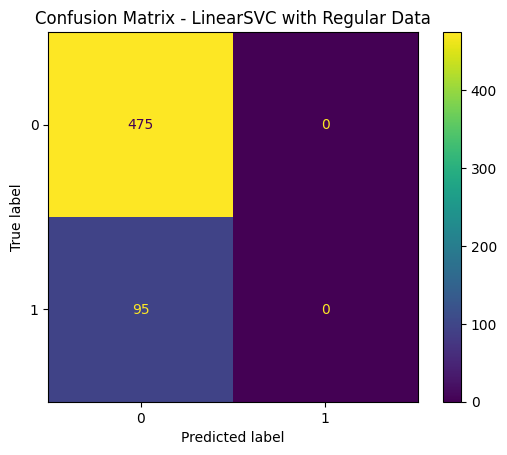

In [168]:
# Fitting the data into LinearSVC model
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(C=4)
lin_svc.fit(X_train, y_train)

# The LinearSVC model's score on the testing data
print('Regular data')
lin_svc_score = lin_svc.score(X_test, y_test)
print('\nClassification accuracy: ', lin_svc_score)

# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std
cv_scores_linsvc = cross_val_score(lin_svc, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc = (str(cv_scores_linsvc.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc.std().round(5)))
print('\nCross validation score: ', cv_score_linsvc)

# LinearSVC Classification report - After Standardization

linsvc_report = classification_report(y_test, lin_svc.predict(X_test_std))
print(linsvc_report)

# Model's predictions on the test data
y_pred_linsvc = lin_svc.predict(X_test)
disp_linsvc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc))
disp_linsvc.plot()
plt.title('Confusion Matrix - LinearSVC with Regular Data')
plt.show()

Standardised data


Standardized data
Classification accuracy:  0.9964912280701754


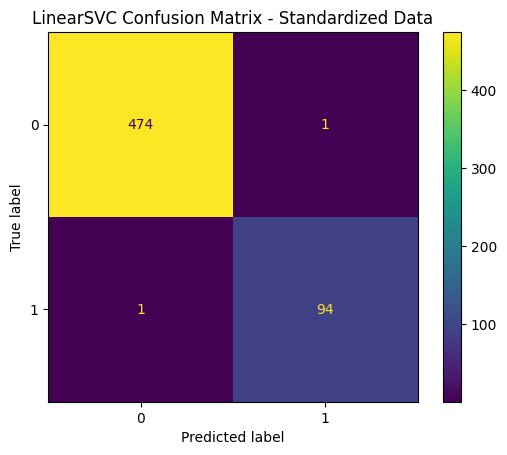

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       0.99      0.99      0.99        95

    accuracy                           1.00       570
   macro avg       0.99      0.99      0.99       570
weighted avg       1.00      1.00      1.00       570


 0.99417 +/- 0.00608


In [167]:
# Fitting the Standardized data into LinearSVR model
lin_svc_std = LinearSVC(C=2)
lin_svc_std.fit(X_train_std, y_train)

# The LinearSVC model's score on the testing data
print('\nStandardized data')
lin_svc_score_std = lin_svc_std.score(X_test_std, y_test)
print('Classification accuracy: ', lin_svc_score_std)

## Confusion Matrix - After Standardization

# Model's predictions on the test data
y_pred_linsvc_std = lin_svc_std.predict(X_test_std)

disp_linsvc_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc_std))
disp_linsvc_std.plot()
plt.title('LinearSVC Confusion Matrix - Standardized Data')
plt.show()

# LinearSVC Classification report - After Standardization

linsvc_std_report = classification_report(y_test, lin_svc_std.predict(X_test_std))
print(linsvc_std_report)

# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc_std = cross_val_score(lin_svc_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc_std = (str(cv_scores_linsvc_std.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc_std.std().round(5)))
print('\n', cv_score_linsvc_std)